In [ ]:
!pip install requests
!pip install mojito2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00


In [ ]:
import requests
import mojito
import pprint
mojito.__version__


'0.1.6'

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
APP_KEY = os.getenv("APP_KEY")
APP_SECRET = os.getenv("APP_SECRET")
ACCOUNT_NO = os.getenv("ACCOUNT_NO")


In [ ]:
broker = mojito.KoreaInvestment(
  api_key=APP_KEY,
  api_secret=APP_SECRET,
  acc_no=ACCOUNT_NO
)
broker

In [ ]:
#resp = broker.fetch_price("005930")
#pprint.pprint(resp)
resp = broker.fetch_today_1m_ohlcv("005930")
pprint.pprint(resp)

In [ ]:
domain_url = "https://openapi.koreainvestment.com:9443"
price_url = "/uapi/domestic-stock/v1/quotations/inquire-price"
accessToken_url = "/oauth2/tokenP"

In [ ]:
header_accessToken = {
    "content-type": "application/json",
}

body_accessToken = {
    "grant_type": "client_credentials",
    "appKey": APP_KEY,
    "appSecret": APP_SECRET
}
len(header_accessToken['content-type']), len(body_accessToken['grant_type'])

(16, 18)

In [ ]:
import json

def post_content(url, data= None):
  print(data)
  res = requests.post(url, data=json.dumps(data))

  rescode = res.status_code
  if rescode == 200:
    print(res.headers)
    print(str(rescode) + " | " + res.text)
  else:
    print("Error Code : " + str(rescode) + " | " + res.text)

In [ ]:
post_content(domain_url + accessToken_url, data = body_accessToken)

{'grant_type': 'client_credentials', 'appKey': 'PSwBQavTUFWrF1VPRVW6QsWOgHoroSv8k30W', 'appSecret': 'QwqVRZOhVfKOs71dvN7q293QqS7t5dK3KZrGRlP9ZlrVf8edanU+TarQT9Y/sxY1veH6CRb46kXU6EWM3lXM+RHfQaCRxH0dP3LlyUbADN8MsJgaBVDn01v4PTonezSpmlHdvTXOtLSCQmijufHevKUN7NMh6ienJ2GSC4J3nCDz3P4XAdE='}
Error Code : 403 | {"error_description":"서버 에러가 발생했습니다.","error_code":"EGW00002"}


In [ ]:
params_c = {
    "fid_cond_mrkt_div_code": "FID조건시장분류코드",
    "fid_input_iscd": "FID입력종목코드"
}
headers_c = {
    "Content-Type": "application/json",
    #"authorization": "Bearer {TOKEN}",
    "appKey": APP_KEY,
    "appSecret": APP_SECRET,
    "personalSeckey": "{personalSeckey}",
    "tr_id": "FHKST01010100",
    "tr_cont": "",
    "custtype": "법인(B), 개인(P)",
    "seq_no": "법인(01), 개인( )",
    "mac_address": "{Mac_address}",
    "phone_num": "P01011112222",
    "ip_addr": "{IP_addr}",
    "hashkey": "{Hash값}",
    "gt_uid": "{Global UID}"
}

In [ ]:
# Explicitly encode headers as UTF-8
for key, value in headers.items():
    if isinstance(value, str):
        headers[key] = value.encode('utf-8')

for key, value in header_accessToken.items():
    if isinstance(value, str):
        headers[key] = value.encode('utf-8')

In [ ]:
import yfinance as yf
data = yf.download("AAPL", period="2y")
data.head(), type(data)

[*********************100%%**********************]  1 of 1 completed


(             Adj Close       Close        High         Low        Open  \
 Date                                                                     
 2022-08-08  163.252045  164.869995  167.809998  164.199997  166.369995   
 2022-08-09  163.301544  164.919998  165.820007  163.250000  164.020004   
 2022-08-10  167.579163  169.240005  169.339996  166.899994  167.679993   
 2022-08-11  166.836502  168.490005  170.990005  168.190002  170.059998   
 2022-08-12  170.411072  172.100006  172.169998  169.399994  169.820007   
 
               Volume  
 Date                  
 2022-08-08  60276900  
 2022-08-09  63135500  
 2022-08-10  70170500  
 2022-08-11  57149200  
 2022-08-12  68039400  ,
 pandas.core.frame.DataFrame)

In [ ]:
mid = (data.High + data.Low) / 2
mid = mid.to_list()
type(mid), len(mid), mid

(list,
 501,
 [166.00499725341797,
  164.53500366210938,
  168.1199951171875,
  169.59000396728516,
  170.78499603271484,
  172.37000274658203,
  172.68500518798828,
  174.36000061035156,
  174.00999450683594,
  172.5250015258789,
  168.5,
  167.68000030517578,
  167.18000030517578,
  169.24500274658203,
  167.30500030517578,
  161.36000061035156,
  160.13999938964844,
  158.86000061035156,
  156.5449981689453,
  157.66500091552734,
  155.38999938964844,
  155.13999938964844,
  154.5199966430664,
  156.28500366210938,
  161.77999877929688,
  156.95499420166016,
  155.3550033569336,
  153.31000518798828,
  149.86000061035156,
  151.8300018310547,
  155.5800018310547,
  156.17000579833984,
  152.69000244140625,
  150.01499938964844,
  151.7050018310547,
  152.33499908447266,
  147.73999786376953,
  143.6999969482422,
  140.5500030517578,
  140.3800048828125,
  145.23999786376953,
  145.19499969482422,
  146.37999725341797,
  141.2750015258789,
  140.2300033569336,
  139.78500366210938,
 

In [ ]:
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np



In [ ]:
x = mid[:500]
y = mid[1:501]
len(x),len(y)

(500, 500)

In [ ]:
xtrain = torch.tensor(x[:400], dtype = torch.float32)
xtest = torch.tensor(x[400:], dtype = torch.float32)
ytrain = torch.tensor(y[:400], dtype = torch.float32)
ytest = torch.tensor(y[400:], dtype = torch.float32)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(torch.Size([400]), torch.Size([100]), torch.Size([400]), torch.Size([100]))

In [ ]:
torch.autograd.set_detect_anomaly(True)

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')


class RNN(nn.Module):
    """분류 점수와 hidden descriptor를 출력해주는 간단한 RNN을 구현해보자"""

    def __init__(self, dim_input, dim_recurrent, dim_output):
        """ RNN에 필요한 층들을 생성해보자
        매개변수(Parameters)
        ----------
        dim_input: int
        입력받을 데이터의 차원 (C)
        dim_recurrent: int
        RNN에서 쓰일 hidden state의 차원 (D)
        dim_output: int
        RNN에서 출력할 분류 점수의 차원 (K)
        """
        super(RNN, self).__init__()
        # 10, 50, 2
        self.fc_x2h = nn.Linear(dim_input, dim_recurrent)
        self.fc_h2h = nn.Linear(dim_recurrent, dim_recurrent, bias=False)
        self.fc_h2y = nn.Linear(dim_recurrent, dim_output)
        self.relu = nn.ReLU()

    def forward(self, x, h=None):
        """ RNN의 순전파를 구현해보자.
        비록 최종 분류 점수만을 기반으로 손실함수의 값이 계산되지만,
        전체 수열에 대한 hidden state와 분류 점수들 모두 리턴할 것이다.
        매개변수(Parameters)
        ----------
        x: torch.Tensor, shape=(T, C)
        수열이 One-hot 인코딩된 배열
        h: Optional[torch.Tensor], shape=(1, D)
        최초의 hidden state를 나타낸다.
        입력된 값이 없을 경우 0으로 값이 초기화된 배열로 설정한다.

        반환 값(Returns)
        -------
        Tuple[y, h]
        y: torch.Tensor, shape=(T, K)
        각 스텝마다 계산된 결과 값들(분류 점수)
        h: torch.Tensor, shape=(T, D)
        각 스텝마다 계산된 hidden state들
        """
        # 최초 hidden state 값이 입력되지 않은 경우, 모든 원소를 0으로 초기화한다.
        if h is None:
            h = torch.zeros(1, self.fc_h2h.out_features, device=x.device)

        h_list = []

        # 각 x_t에 대해 대응되는 h_t를 저장해놓도록 하자. (h_0 제외)
        # 하나씩 꺼낼 경우, x_t는 one-hot encoding된 형태인, [10]의 형태를 띤다. -> unsqueeze
        # x_t.unsqueeze(0)는 (C,) 모양의 x_t를 (1, C) 모양으로 바꾸어준다.
        # h는 (1, D) 모양의 hidden descriptor이다.
        # for 문을 이용하여 x 내의 데이터를 한 스텝씩 꺼낸다.
        for x_t in x:
            x_t = x_t.unsqueeze(0)
            h_new = self.fc_x2h(x_t) + self.fc_h2h(h.clone())
            h = self.relu(h_new)
            h_list.append(h)
            # y_out = self.fc_h2y(h_t)


        # T개의 descriptor들이 있는 (T, D)모양의 배열 (각 descriptor는 (D,) 모양이다)
        # 즉, RNN의 모든 hidden state를 하나의 행렬로 묶어서 return할 것이다. (torch.cat 기능 사용할 것)
        # https://pytorch.org/docs/stable/generated/torch.cat.html
        all_h = torch.cat(h_list, dim=0)


        # all_y는 T개의 예측 점수가 들어 있는 (T, K) 모양의 배열이다.
        # 각 점수들은 T개의 hidden descriptor로부터 각기 산출된다.

        all_y = self.fc_h2y(all_h)

        return all_y, all_h # 반드시 최종 출력 all_y와 all_h를 둘 다 return해야 한다.

In [ ]:
from IPython.display import clear_output
def plot_all(losses, acces):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Loss')
    plt.plot(acces, label='acc')
    plt.xlabel('Epoch (it must multiple x 1000)')
    plt.ylabel('Loss and Acc')
    plt.title('Loss and Acc Averages over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
def plot_accuracy(train_accuracies, test_accuracies):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Error Rate')
    plt.plot(test_accuracies, label='Test Error Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate')
    plt.title('Training and Testing Error over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
def accuracy(predictions, truth):
    #RMSE
    error = torch.sqrt(criterion(predictions, truth))
    return error

In [ ]:
# 여기에 코드 작성
model = RNN(dim_input = 1, dim_recurrent = 100, dim_output = 1)
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [ ]:
def run(batch_size, num_epochs):
  # 학습 파라미터
  #batch_size = 10
  #num_epochs = 100

  train_accuracies = []
  test_accuracies = []

  # 학습 루프
  for epoch in range(num_epochs):
    model.train()
    idxs = np.arange(len(xtrain))
    # shuffle 하면 x -> 시계열 이니까!!
    #np.random.shuffle(idxs)

    for batch_cnt in range(0, len(xtrain) // batch_size):
        batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]
        batch_train = xtrain[batch_indices]
        truth_train = ytrain[batch_indices]

        optimizer.zero_grad() # optimizer 기울기 초기화
        all_y, all_h = model(batch_train) # 은닉층부터 출력층의 가중치 곱까지의 순전파에서 전달되는 값 구하기
        predictions = all_y[-1]
        loss = torch.sqrt(criterion(predictions, truth_train)) # 출력층의 활성함수와 결합된 손실함수 값 구하기
        loss.backward() # torch의 자동미분 함수를 활용하여 역전파 진행
        optimizer.step() # optimizer의 한 스텝 진행

    model.eval()
    with torch.no_grad():
        #train_acc = criterion(model(xtrain)[0][-1], ytrain)
        train_acc = accuracy(model(xtrain)[0][-1], ytrain)
        #test_acc = criterion(model(xtest)[0][-1], ytest)
        test_acc = accuracy(model(xtest)[0][-1], ytest)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    if epoch % batch_size == 0:
      plot_accuracy(train_accuracies, test_accuracies)
      print(f"Epoch {epoch}/{num_epochs}, Train Error Rate: {train_acc:.4f}, Test Error Rate: {test_acc:.4f}")
  plot_accuracy(train_accuracies, test_accuracies)
  print(f"Epoch {num_epochs}/{num_epochs}, Train Error Rate: {train_acc:.4f}, Test Error Rate: {test_acc:.4f}")


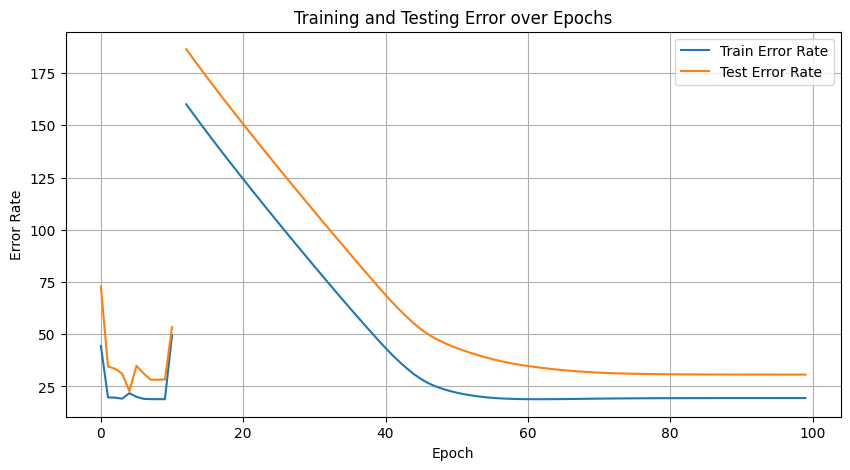

Epoch 100/100, Train Error Rate: 19.4135, Test Error Rate: 30.6594


In [ ]:
run(10,100) #recurrent cell=100

In [ ]:
mid_sample = mid[:-1]
mid_truth = mid[1:]
len(mid_sample), len(mid_truth)

(500, 500)

In [ ]:
mid_sample = torch.tensor(mid_sample, dtype=torch.float32)
mid_truth = torch.tensor(mid_truth, dtype=torch.float32)
output, _ = model(mid_sample)
output.shape, mid_truth.shape

<ipython-input-83-27df33b3422d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mid_sample = torch.tensor(mid_sample, dtype=torch.float32)
<ipython-input-83-27df33b3422d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mid_truth = torch.tensor(mid_truth, dtype=torch.float32)


(torch.Size([500, 1]), torch.Size([500]))

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
def plot_test(train_accuracies, test_accuracies):
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Error Rate')
    plt.plot(test_accuracies, label='Test Error Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate')
    plt.title('Training and Testing Error over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

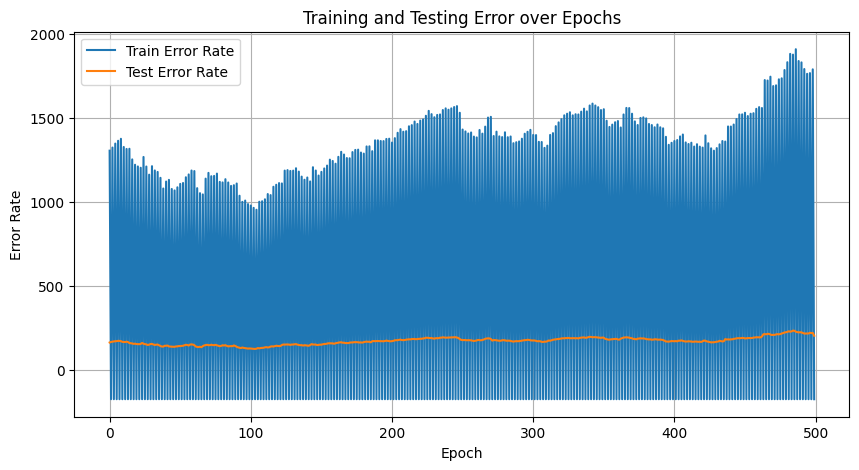

In [ ]:
predict_line = output.clone().detach().numpy()
plot_test(-predict_line,mid_truth)


In [ ]:
predict_line.shape, mid_truth.shape

(torch.Size([500]), torch.Size([500]))

In [ ]:
# 여기에 코드 작성
model = RNN(dim_input = 1, dim_recurrent = 200, dim_output = 1)
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

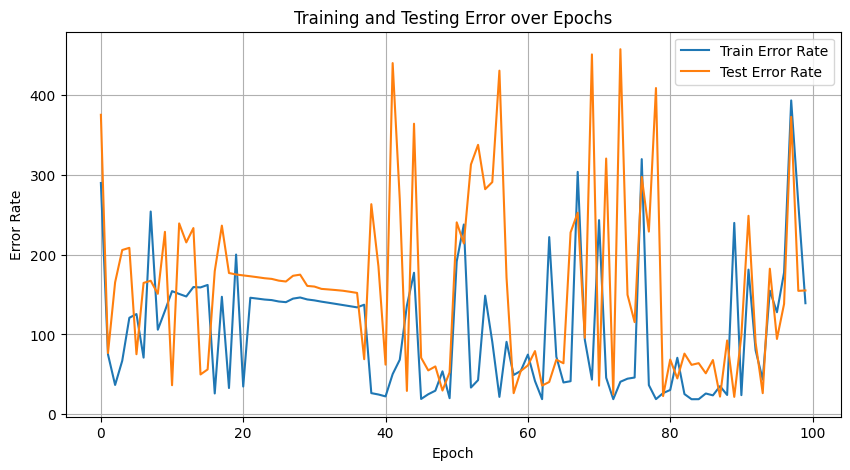

Epoch 100/100, Train Error Rate: 139.1304, Test Error Rate: 155.1179


In [ ]:
run(10,100) #recurrent cell=500

In [ ]:
len(mid)

501

In [ ]:
output

tensor([[-6022.7109],
        [  168.2892]], grad_fn=<AddmmBackward0>)

In [ ]:
num_epochs = 100
batch_size = 10

train_acc = []
test_acc = []

for epoch in range(num_epochs):
  model.train()
  idxs = np.arange(len(xtrain))
  np.random.shuffle(idxs)

  for batch_cnt in range(0, len(xtrain) / batch_size):
    batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]
    batch_train = xtrain[batch_indices]
    truth_train = ytrain[batch_indices]

    optimizer.zero_grad()
    output = model(batch_train)
    loss = criterion(output, truth_train)
    loss.backward()
    optimizer.step()


TypeError: 'float' object cannot be interpreted as an integer

<Axes: xlabel='Date'>

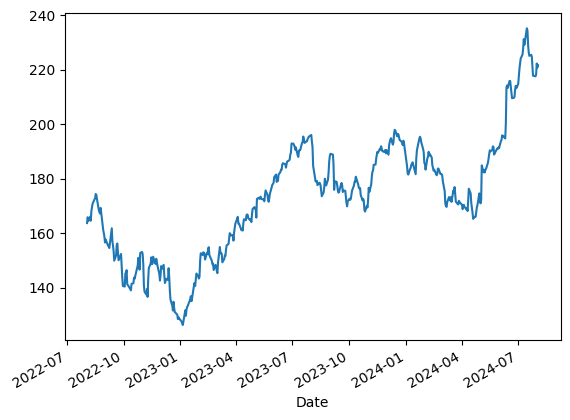

In [ ]:
import matplotlib

l.plot()

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

%matplotlib inline

In [24]:
# datasetsMNIST를 이용하여 바로 mnist 데이터 셋을 가져올 수 있습니다 !!
train_dataset = datasets.MNIST('dataset', train=True, download=True,
               transform=transforms.Compose([
                   transforms.ToTensor()
]))

test_dataset = datasets.MNIST('dataset', train=False, download=True,
               transform=transforms.Compose([
                   transforms.ToTensor()
]))
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: dataset
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: dataset
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [30]:
train_loader = torch.utils.data.DataLoader(train_dataset)
test_loader = torch.utils.data.DataLoader(test_dataset)
img, label = next(iter(train_loader))

#loader 구조 -> [img(1,1,28,28), label(1)] 이렇게 리스트로 묶여 있음.

In [31]:
img.shape

torch.Size([1, 1, 28, 28])

In [32]:
img_show = img.squeeze(0).squeeze(0)
img_show.shape

torch.Size([28, 28])

In [49]:
train_imgs = []
for sample in train_loader:
  train_imgs.append(sample[0].reshape(1,-1).squeeze(0))

len(train_imgs)

60000

In [50]:
train_imgs[0].shape

torch.Size([784])

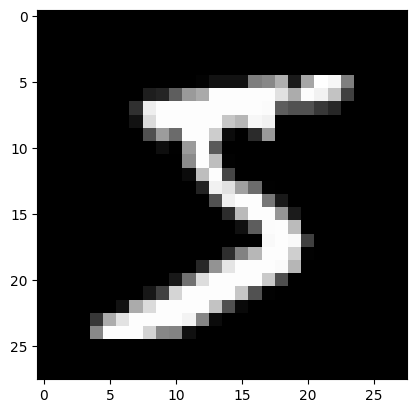

In [39]:
plt.imshow(img_show, 'gray')
plt.show()

In [42]:
class autoencoder(nn.Module):

  def __init__(self, dim_inNout, num_hidden):
    super(autoencoder, self).__init__()
    self.encoder = nn.Linear(dim_inNout, num_hidden)
    self.decoder = nn.Linear(num_hidden, dim_inNout)

    # He-normalize
    nn.init.normal_(self.encoder.weight, std=0.01)
    nn.init.normal_(self.decoder.weight, std=0.01)

  def __call__(self, x):
    x = F.relu(self.encoder(x))
    x = self.decoder(x)
    return x


In [45]:
model = autoencoder(dim_inNout=784, num_hidden=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [46]:
num_epochs = 100
batch_size = 100

In [59]:
type(batch_size), type(int(len(train_imgs)/batch_size))

(int, int)

In [ ]:
for epoch in range(num_epochs):
  model.train()
  idxs = np.arange(len(train_imgs))
  np.random.shuffle(idxs)

  for batch_cnt in range(int(len(train_imgs) / batch_size)):
    batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]
    train_datas = [train_imgs[i] for i in batch_indices]
    train_datas = torch.stack(train_datas)

    optimizer.zero_grad()
    output = model(train_datas)
    loss = criterion(output, train_datas)
    loss.backward()
    optimizer.step()
  print("epochs:", epoch)

epochs: 0
epochs: 1
epochs: 2
epochs: 3
epochs: 4
epochs: 5
epochs: 6
epochs: 7
epochs: 8
epochs: 9
epochs: 10
epochs: 11
epochs: 12
epochs: 13
epochs: 14
epochs: 15
epochs: 16
epochs: 17
epochs: 18
epochs: 19
epochs: 20
epochs: 21
epochs: 22
epochs: 23
epochs: 24
epochs: 25
epochs: 26
epochs: 27
epochs: 28
epochs: 29
epochs: 30
epochs: 31
epochs: 32
epochs: 33
epochs: 34
epochs: 35
epochs: 36
epochs: 37
epochs: 38
epochs: 39
epochs: 40
epochs: 41
epochs: 42
epochs: 43
epochs: 44
epochs: 45
epochs: 46
epochs: 47
epochs: 48
epochs: 49
epochs: 50
epochs: 51
epochs: 52
epochs: 53
epochs: 54
epochs: 55
epochs: 56
epochs: 57
epochs: 58
epochs: 59
epochs: 60
epochs: 61
epochs: 62
epochs: 63
epochs: 64
epochs: 65
epochs: 66
epochs: 67
epochs: 68
epochs: 69
epochs: 70
epochs: 71
epochs: 72
epochs: 73
epochs: 74
epochs: 75
epochs: 76
epochs: 77
epochs: 78
epochs: 79
epochs: 80
epochs: 81
epochs: 82
epochs: 83
epochs: 84
epochs: 85
epochs: 86
epochs: 87
epochs: 88
epochs: 89
epochs: 90
epochs: 9

In [ ]:
sample = model(img_show)
sample.shape
sample.reshape(28,28)
plt.imshow(sample, 'gray')
plt.show()

In [62]:
type(train_imgs[2]), train_imgs[2].shape

(torch.Tensor, torch.Size([784]))

In [64]:
train_imgs(batch_indices)

TypeError: 'list' object is not callable